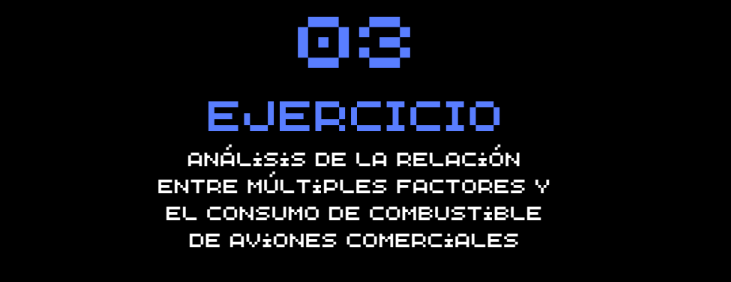
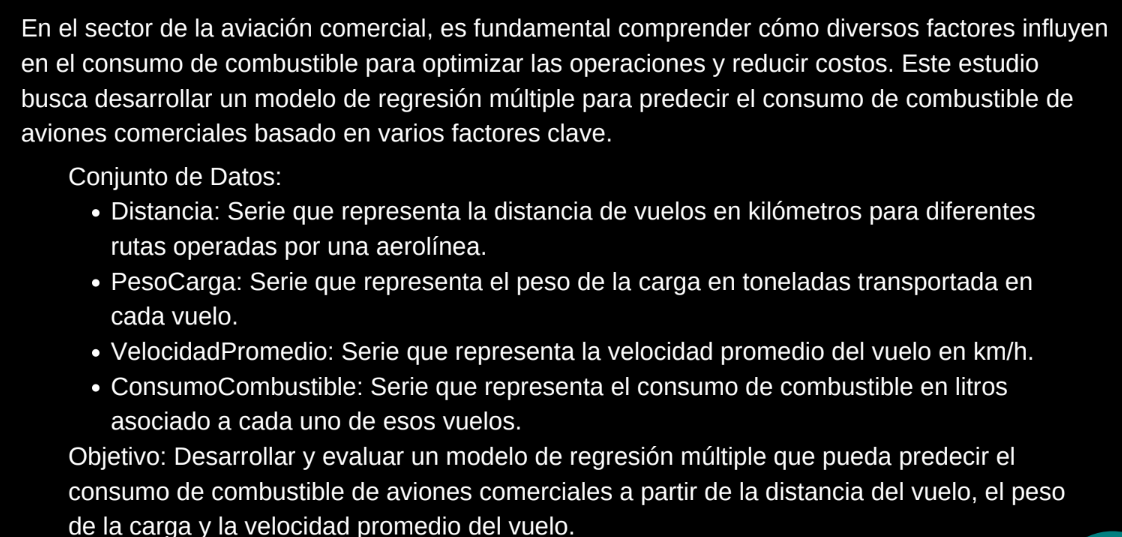
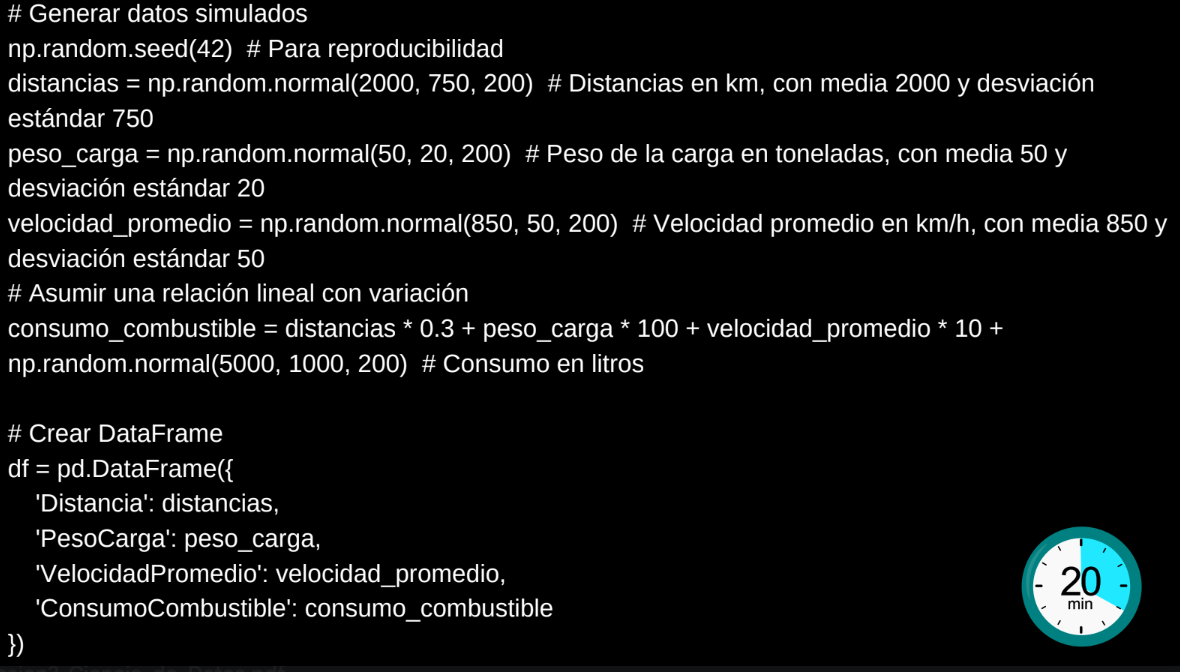

In [21]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#Creación de modelo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
np.random.seed(42) #Para reproducibilidad
distancias = np.random.normal(2000,750,200) #Distancias en km, con media de 2000, y desviacion estandar 750
peso_carga = np.random.normal(50,20,200) #Peso de la carga en toneladas, con media 50 y desviación estándar 20
velocidad_promedio = np.random.normal(850,50,200) #Velocidad promedio en km/h, con media 850 y desviación estándar 50
#Asumir una relación lineal con variación
consumo_combustible = distancias*0.3 + peso_carga * 100 + velocidad_promedio*10 + np.random.normal(5000,1000,200) #consumo en litros

#Crear dataframe
df= pd.DataFrame({'Distancia':distancias,'PesoCarga':peso_carga,'VelocidadPromedio':velocidad_promedio,'ConsumoCombustible':consumo_combustible})

In [3]:
df.head()

,Distancia,PesoCarga,VelocidadPromedio,ConsumoCombustible
0,2372.535615,57.155747,770.278617,19887.110192
1,1896.301774,61.215691,820.031249,18968.606749
2,2485.766404,71.661025,850.262185,22284.060177
3,3142.272392,71.076041,852.349030,22929.413977
4,1824.384969,22.446613,827.496726,16480.378922


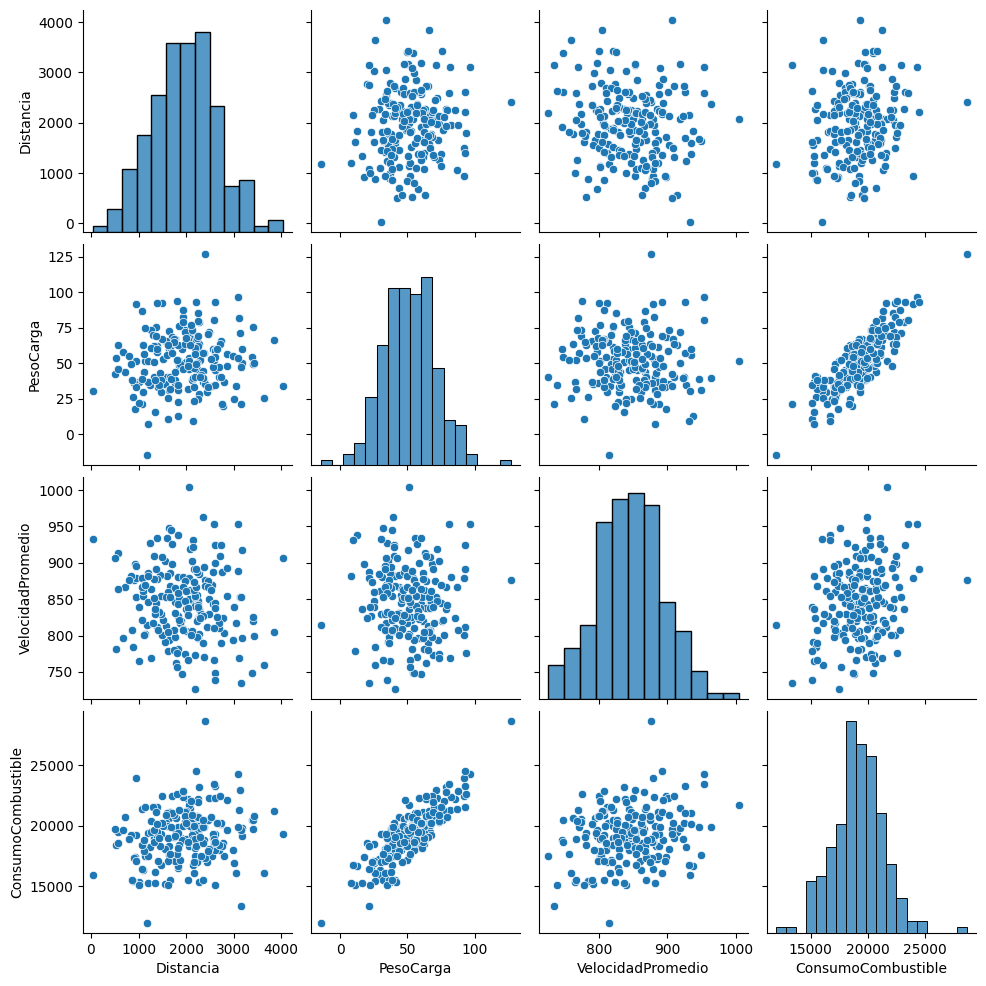

In [4]:
#Visualizar las relaciones entre las variables independientes y la variable dependiente
sns.pairplot(df)
plt.show()

In [5]:
#Analisis de correlación
print("Correlacion entre variables:")
print(df.corr())

Correlacion entre variables:
                    Distancia  PesoCarga  VelocidadPromedio  \
Distancia            1.000000   0.095147          -0.134197   
PesoCarga            0.095147   1.000000          -0.032626   
VelocidadPromedio   -0.134197  -0.032626           1.000000   
ConsumoCombustible   0.178724   0.843217           0.230578   

                    ConsumoCombustible  
Distancia                     0.178724  
PesoCarga                     0.843217  
VelocidadPromedio             0.230578  
ConsumoCombustible            1.000000  


In [6]:
df.corr()

,Distancia,PesoCarga,VelocidadPromedio,ConsumoCombustible
Distancia,1.000000,0.095147,-0.134197,0.178724
PesoCarga,0.095147,1.000000,-0.032626,0.843217
VelocidadPromedio,-0.134197,-0.032626,1.000000,0.230578
ConsumoCombustible,0.178724,0.843217,0.230578,1.000000


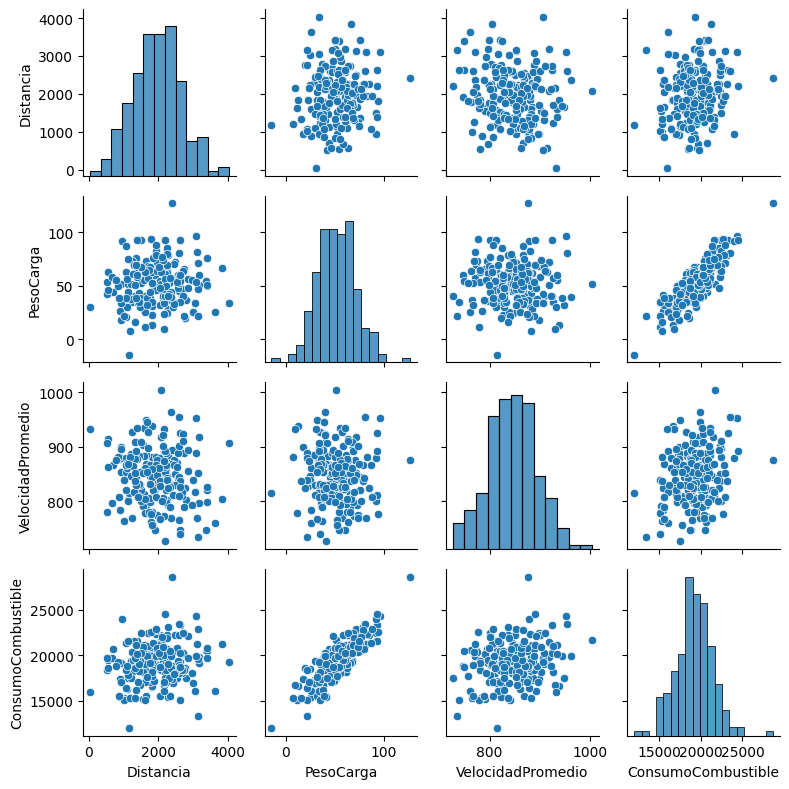

In [11]:
sns.pairplot(df, height=2)
plt.tight_layout()
#vemsos todoas las relaciones que podemos encontrar

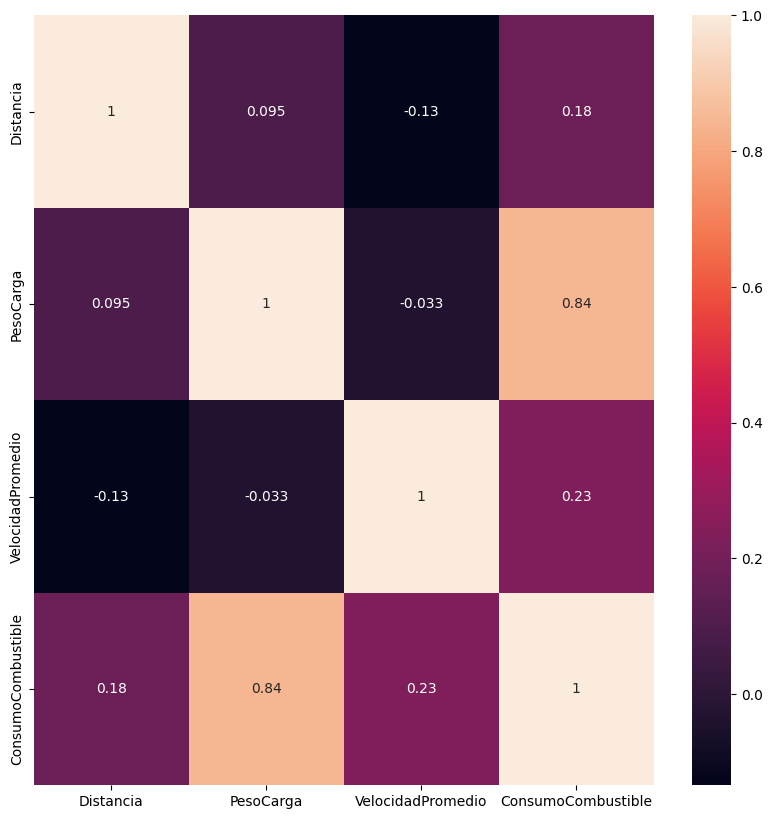

In [10]:
sns.heatmap(data=df.corr(), annot=True)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [13]:
#Prepara los datos para el modelo de regresión multiple:
X = df[['Distancia','PesoCarga','VelocidadPromedio']] #variables independientes
y = df['ConsumoCombustible'] #variable dependiente

In [19]:
#Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

#Crear y entrenar el modelo de regresión multiple
modelo = LinearRegression()
modelo.fit(X_train,y_train)


LinearRegression()

In [20]:

print('Coeficientes: \n', modelo.coef_)
print('Término independiente: \n', modelo.intercept_)

Coeficientes: 
 [ 0.43376966 91.45321676 11.73561259]
Término independiente: 
 3743.815324372299


In [27]:
#Predecir y evaluar el modelo:
y_train_predict = modelo.predict(X_test)
mse = mean_squared_error(y_test,y_train_predict)
r2 = r2_score(y_test, y_train_predict)
#Coeficientes de la funcion
print("Evaluacion del modelo: ")
print("MSE (Error Cuadratico Medio): ",mse) 
print('R2 Coeficiente de Determinación {}'.format(r2))

Evaluacion del modelo: 
MSE (Error Cuadratico Medio):  860433.8797944819
R2 Coeficiente de Determinación 0.8659810917327164


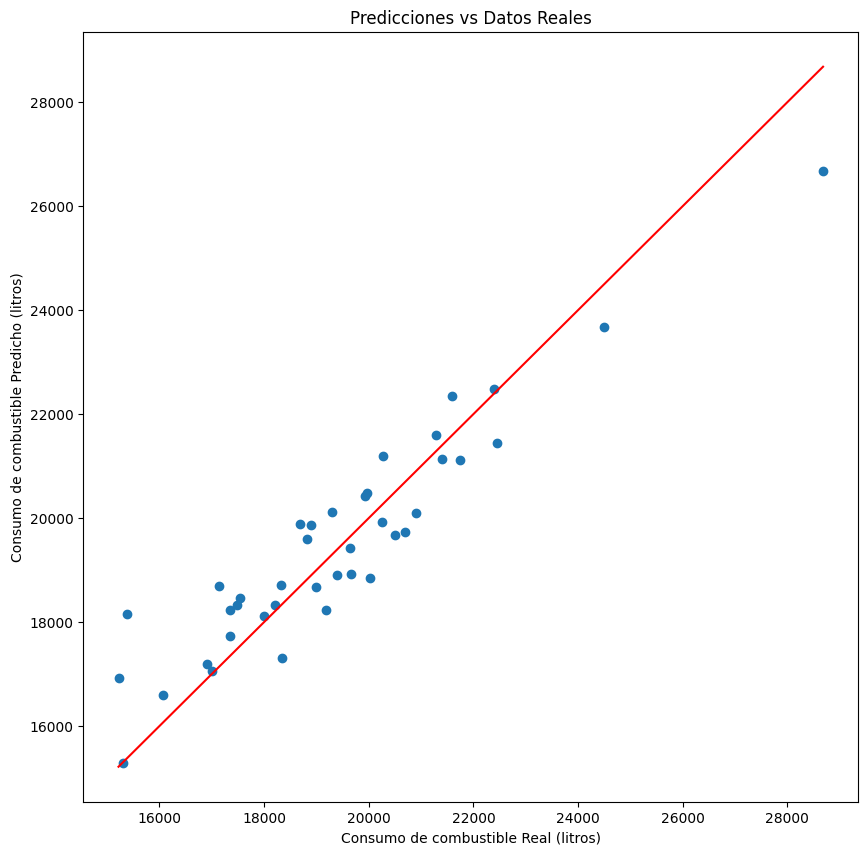

In [29]:
#Visualizar las predicciones del modelo y compararlas con los datos reales:
plt.scatter(y_test,y_train_predict)
plt.title('Predicciones vs Datos Reales')
plt.xlabel('Consumo de combustible Real (litros)')
plt.ylabel('Consumo de combustible Predicho (litros)')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color = 'red') #Lina de identidad
plt.show()

In [30]:
#Mostrar los coeficientes del modelo:
print("Coeficientes del modelo:")
print(f"Intercepto: {modelo.intercept_}")
print(f"Coeficientes: {modelo.coef_}")
print(f"Distancia: {modelo.coef_[0]}")
print(f"PesoCarga: {modelo.coef_[1]}")
print(f"VelocidadPromedio: {modelo.coef_[2]}")

Coeficientes del modelo:
Intercepto: 3743.815324372299
Coeficientes: [ 0.43376966 91.45321676 11.73561259]
Distancia: 0.43376965651556176
PesoCarga: 91.45321675968833
VelocidadPromedio: 11.73561258535166
